# Python Programming - Pair Assignment

This submission is by Clarin D Souza and Sahawut Aunanant

<h3>Table of Contents<span class="tocSkip"></span></h3>
<div class="toc"><ul class="toc-item">

<li><span><a href="#Business-Context" data-toc-modified-id="Business-Context"><span class="toc-item-num"></span>Business Context</a></span></li>
    
<li><span><a href="#Section-1.-Configuration:-Importing-libraries-to-get-data" data-toc-modified-id="Section-1.-Configuration:-Importing-libraries-to-get-data"><span class="toc-item-num"></span>Section 1. Configuration: Importing libraries to get data</a></span></li>
    
<li><span><a href="#Section-2.-Working-with-Data:-Data-preparation-and-pre-processing" data-toc-modified-id="Section-2.-Working-with-Data:-Data-preparation-and-pre-processing"><span class="toc-item-num"></span>Section 2. Working with Data: Data preparation and pre-processing</a></span></li>

<ul class="toc-item"><li><span><a href="#Section-2.1-Data-Preparation" data-toc-modified-id="Section-2.1-Data-Preparation"><span class="toc-item-num"></span>Section 2.1 Data Preparation</a></span></li>
    
<li><span><a href="#Section-2.2-Data-Pre-processing" data-toc-modified-id="Section-2.2-Data-Pre-processing"><span class="toc-item-num"></span>Section 2.2 Data Pre-processing</a></span></li>

<li><span><a href="#Section-2.3-Outlier-Detection" data-toc-modified-id="Section-2.3-Outlier-Detection"><span class="toc-item-num"></span>Section 2.3 Outlier Detection</a></span></li></ul></li>

<li><span><a href="#Section-3.-Data-Visualisation" data-toc-modified-id="Section-3.-Data-Visualisation"><span class="toc-item-num"></span>Section 3. Data Visualisation</a></span>
    
<ul class="toc-item"><li><span><a href="#Section-3.1-Statistical-Inferences" data-toc-modified-id="Section-3.1-Statistical-Inferences"><span class="toc-item-num"></span>Section 3.1 Statistical Inferences</a></span></li>
    
<li><span><a href="#Section-3.2-Feature-Selection" data-toc-modified-id="Section-3.2-Feature-Selection"><span class="toc-item-num"></span>Section 3.2 Feature Selection</a></span></li>

<li><span><a href="#Section-3.3-Geospatial-Analysis" data-toc-modified-id="Section-3.3-Geospatial-Analysis"><span class="toc-item-num"></span>Section 3.3 Geospatial Analysis</a></span></li></ul></li>
    
<li><span><a href="#Section-4.-Text-Analysis" data-toc-modified-id="Section-4.-Text-Analysis"><span class="toc-item-num"></span>Section 4. Text Analysis</a></span>
    
<ul class="toc-item"><li><span><a href="#Section-4.1-Tokenisation-and-Stopwords" data-toc-modified-id="Section-4.1-Tokenisation-and-Stopwords"><span class="toc-item-num"></span>Section 4.1 Tokenisation and Stopwords</a></span></li>
    
<li><span><a href="#Section-4.2-Amenities-Word-Cloud" data-toc-modified-id="Section-4.2-Amenities-Word-Cloud"><span class="toc-item-num"></span>Section 4.2 Amenities Word Cloud</a></span></li></ul></li>
    
    
<li><span><a href="#Mini-Report" data-toc-modified-id="Mini-Report"><span class="toc-item-num"></span>Mini Report</a></span></li>
    
</ul></div>

**--------------------------------------------------------------------------------------- START OF SUBMISSION ---------------------------------------------------------------------------------------**

# Business Context

AirBnB is a leading firm in hospitality and following their mission, they want to place their focus on establishing positive exchanges between guests and hosts in Edinburgh, one of the most populous cities in Scotland, housing the prestigious University of Edinburgh.

They seek assistance from the University's finest data analysts to analyse currently offered listings, make necessary recommendations and suggest changes to improve their services in this city of medieval history. Most of the current listings cover the city centre area; however, there is still a business opportunity gap in which data-driven analysis could support its business growth plan. 

This study will help define strategic decision on Airbnb property listing expansion, focusing on the below objectives:
* Distribution of listings
* Potential for expansion
* Feature selection for price impact
* Provision of facilities

**-------------------------------------------------------------------------------------------- START OF CODE --------------------------------------------------------------------------------------------**

### Section 1. Configuration: Importing libraries to get data

In [25]:
# Importing necessary libraries for data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 80)

# Importing necesary libraries for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for geospatial analysis
!pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

# Importing libraries for text analysis
import re
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install spacy -q
!python -m spacy download en_core_web_sm -q
from wordcloud import WordCloud
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**Note:** The `listings.csv.gz` compressed file was downlaoded from AirBnB's official website. The below step was performed to extract `listings.csv` file from downlaoded csv.gz compressed file. This was a `one-time process` that was performed and the csv file is now saved in an online repository

**Data source:** [listings.csv](https://media.githubusercontent.com/media/nonsahawut/python3/main/listings.csv)

In [26]:
# Converting the compressed csv file using gzip to save listings data in csv - One time step
# import gzip

# my_filename = 'AirBnB Files/listings.csv.gz'

# with gzip.open(my_filename, 'rt', encoding="utf8") as gz_file:
#     data = gz_file.read() # read decompressed data
#     with open(my_filename[:-3], 'wt', encoding="utf8") as out_file:
#          out_file.write(data) # write decompressed data

In [27]:
# Creating dataframes for listings
listings_link = "https://raw.githubusercontent.com/Clarin19/python-pair-programming3/main/listings.csv"
df_listings = pd.read_csv(listings_link)

### Section 2. Working with Data: Data preparation and pre-processing

### Section 2.1 Data Preparation

In [28]:
# Analysing the number of unique listings present in Edinburgh
print('The number of unique listings in Edinburgh', df_listings.id.nunique())

The number of unique listings in Edinburgh 7818


In [29]:
# Displaying the number of variables and their respective data type
print('The number of variables are:', df_listings.shape[1])
print('\nThe data types corresponding to the columns are:')
print(df_listings.dtypes)
df_listings.head(3)

The number of variables are: 75

The data types corresponding to the columns are:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate    

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,31523141,https://www.airbnb.com/rooms/31523141,20220913165705,2022-09-13,city scrape,"Cosy, comfy, entire house, 2 bedrooms and slee...","This bright, comfy property is situated south ...",The property is located in a sought after quie...,https://a0.muscache.com/pictures/7073d814-67fd...,942783,...,4.80,4.64,4.38,NaN,t,1,1,0,0,1.06
1,16612439,https://www.airbnb.com/rooms/16612439,20220913165705,2022-09-13,city scrape,Old Manse luxury studio apartment near Edinburgh,We offer a luxury private en-suite studio (whe...,"Quiet rural setting, lots of wildlife, close t...",https://a0.muscache.com/pictures/54a57a07-8549...,69412742,...,4.97,4.91,4.91,NaN,f,1,1,0,0,0.51
2,30558669,https://www.airbnb.com/rooms/30558669,20220913165705,2022-09-13,city scrape,Large Double Room in Shared Flat with Sea View,Light and spacious double room in Georgian sty...,The flat is located right on the sea above a h...,https://a0.muscache.com/pictures/miso/Hosting-...,115744740,...,4.92,4.91,4.90,NaN,f,1,0,1,0,2.11


In [45]:
# Selecting columns which will be used from listings dataframe for further analysis (Selected 15 most relevant features for scope of this analysis project)
df = df_listings[['id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'amenities', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'minimum_nights', 'price',]].copy()

In [46]:
# Observing updated summary of listings dataframe - to be used for further analysis
print('The number of entries are:', df.shape[0])
print('The number of variables are:', df.shape[1])
print('\nThe data types corresponding to the columns are:')
print(df.dtypes)
df.head(3)

The number of entries are: 7818
The number of variables are: 15

The data types corresponding to the columns are:
id                          int64
name                       object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
accommodates                int64
bedrooms                  float64
amenities                  object
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
reviews_per_month         float64
minimum_nights              int64
price                      object
dtype: object


,id,name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,amenities,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,minimum_nights,price
0,31523141,"Cosy, comfy, entire house, 2 bedrooms and slee...",Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,6,2.0,"[""Shampoo"", ""Hangers"", ""Private entrance"", ""St...",259,45,4.22,1.06,3,$105.00
1,16612439,Old Manse luxury studio apartment near Edinburgh,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,2,1.0,"[""Shampoo"", ""Breakfast"", ""Hangers"", ""Private e...",70,32,4.97,0.51,3,$85.00
2,30558669,Large Double Room in Shared Flat with Sea View,Trinity East and The Dudleys,55.98065,-3.19888,Private room,2,1.0,"[""Shampoo"", ""Breakfast"", ""Hangers"", ""Heating"",...",193,87,4.92,2.11,2,$46.00


**Observations:**

We can observe that the `price` column above is of `string` type with prefixed '$' sign, we need to remove this and convert it to float as part of data pre-process

### Section 2.2 Data Pre-processing

In [47]:
# Dropping the $ sign from price and performing data type conversion on price from string to float
df['price'] = df['price'].str.replace('$', '', regex = 'true').str.replace(',', '', regex = 'true')
df['price'] = df['price'].astype(float)
df.head(3)

,id,name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,amenities,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,minimum_nights,price
0,31523141,"Cosy, comfy, entire house, 2 bedrooms and slee...",Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,6,2.0,"[""Shampoo"", ""Hangers"", ""Private entrance"", ""St...",259,45,4.22,1.06,3,105.0
1,16612439,Old Manse luxury studio apartment near Edinburgh,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,2,1.0,"[""Shampoo"", ""Breakfast"", ""Hangers"", ""Private e...",70,32,4.97,0.51,3,85.0
2,30558669,Large Double Room in Shared Flat with Sea View,Trinity East and The Dudleys,55.98065,-3.19888,Private room,2,1.0,"[""Shampoo"", ""Breakfast"", ""Hangers"", ""Heating"",...",193,87,4.92,2.11,2,46.0


In [48]:
# Description for numerical variables
print(df[['price','accommodates','bedrooms','availability_365','number_of_reviews','review_scores_rating','reviews_per_month','minimum_nights']].describe())

              price  accommodates     bedrooms  availability_365  \
count   7818.000000   7818.000000  7648.000000       7818.000000   
mean     183.274367      3.547966     1.645005        119.583141   
std      381.741303      2.108012     1.052884        123.940853   
min        0.000000      0.000000     1.000000          0.000000   
25%       75.000000      2.000000     1.000000          2.000000   
50%      120.000000      3.000000     1.000000         75.000000   
75%      180.000000      4.000000     2.000000        226.000000   
max    20551.000000     16.000000    40.000000        365.000000   

       number_of_reviews  review_scores_rating  reviews_per_month  \
count        7818.000000           7010.000000        7010.000000   
mean           60.859299              4.748013           2.236618   
std            97.648576              0.427013           2.221211   
min             0.000000              0.000000           0.010000   
25%             4.000000              4.68

**Observations:**

* `price` column has 75% of values below 180 USD
* `price` has its maximum value at 20551 USD
* `minimum_nights` has 75% of values within 3 nights
* `minimum_nights` has its maximum value at 1000 nights

### Section 2.3 Outlier Detection

Presence of outliers would compromise our final explanatory analysis and could lead to bias in results. To ensure that we deduce accurate inferences from data, outliers present must be detected and handled (or removed)

Outliers will be removed from `price` and `minimum_nights` by setting the upper and lower limits with respect to their respective Inter Quartile Range

In [49]:
# Identifying outliers for price by caluclating the quartiles
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

upper_limit_price = q3_price + 1.5 * IQR_price
lower_limit_price = q1_price - 1.5 * IQR_price

print('Upper limit set for price:',upper_limit_price)
print('Lower limit set for price:',lower_limit_price)

Upper limit set for price: 337.5
Lower limit set for price: -82.5


In [50]:
# Identifying outliers for minimum_nights by caluclating the quartiles
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

upper_limit_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
lower_limit_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Upper limit set for minimum nights:',upper_limit_minimum_nights)
print('Lower limit set for minimum nights:',lower_limit_minimum_nights)

Upper limit set for minimum nights: 6.0
Lower limit set for minimum nights: -2.0


In [51]:
# Removing outliers for price and minimum nights
df.drop(df[df.minimum_nights > upper_limit_minimum_nights].index, 
              axis=0, inplace=True)

df.drop(df[df.price > upper_limit_price].index, 
              axis=0, inplace=True)

### Section 3. Data Visualisation

### Section 3.1 Statistical Inferences

Now that the outliers have been removed, we can make useful inferences from the updated dataset

In [52]:
# Description for numerical variables
print(df[['price','accommodates','bedrooms','availability_365','number_of_reviews','review_scores_rating','reviews_per_month','minimum_nights']].describe())

             price  accommodates     bedrooms  availability_365  \
count  6908.000000   6908.000000  6773.000000       6908.000000   
mean    125.510133      3.386364     1.549092        119.248118   
std      66.512208      1.797469     0.756438        122.421238   
min       0.000000      0.000000     1.000000          0.000000   
25%      75.000000      2.000000     1.000000          3.000000   
50%     114.000000      3.000000     1.000000         75.000000   
75%     165.000000      4.000000     2.000000        225.000000   
max     337.000000     16.000000     6.000000        365.000000   

       number_of_reviews  review_scores_rating  reviews_per_month  \
count        6908.000000           6370.000000        6370.000000   
mean           65.538796              4.761444           2.352998   
std           101.239727              0.372538           2.267698   
min             0.000000              0.000000           0.010000   
25%             5.000000              4.690000     

**Observations:**

* The average `price` for an AirBnB in Edinburgh is 125.51 USD
* The average `review_score_rating` is 4.76, which is significantly positive

In [53]:
# Analysing the type of properties in Edinburgh and its distribution
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.686740
Private room       0.301679
Hotel room         0.008107
Shared room        0.003474
Name: room_type, dtype: float64

**Observations:**

* The most prominent `room_type` for an AirBnB in Edinburgh is `Entire hme/apt` accounting for **68.67%** of total listings
* `Private room` closely follows with a significant **30.17%** of total listings
* A preference towards `independent properties/listings` is noticed, whereas `Shared room` type only accounting for a mere **0.35%** of total listings

Text(0.5, 0, 'Average AirBnB Price')

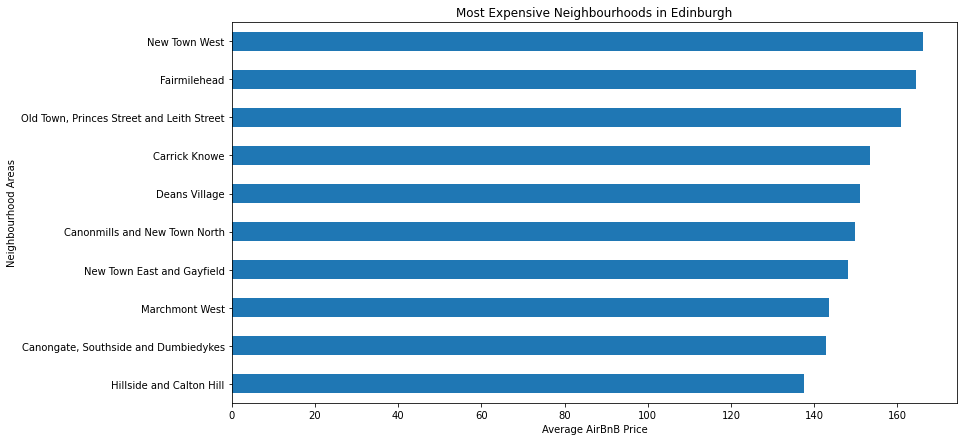

In [54]:
# Plotting the most expensive neighbourhoods 
fig,ax= plt.subplots(figsize= (13,7))
n_plots = 10

df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)[101:].plot.barh()

plt.title('Most Expensive Neighbourhoods in Edinburgh')
initialx=0

ax.set_ylabel('Neighbourhood Areas')
ax.set_xlabel('Average AirBnB Price')

**Observations:**

In Edinburgh, the `top five` neighbourhood areas with `high average price` for an AirBnB are as follows:
1. *New Town West*
2. *Fairmilehead*
3. *Old Town, Princes Street and Leith Street*
4. *Carrick Knowe*
5. *Deans Village*

Text(0.5, 0, 'Average AirBnB Price')

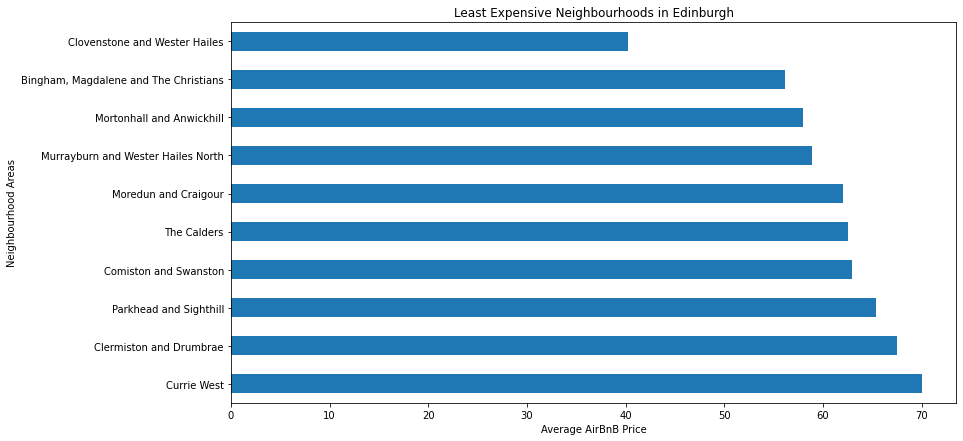

In [55]:
# Plotting the most inexpensive neighbourhoods 
fig,ax= plt.subplots(figsize= (13,7))
n_plots = 10

df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False)[101:].plot.barh()

plt.title('Least Expensive Neighbourhoods in Edinburgh')
initialx=0

ax.set_ylabel('Neighbourhood Areas')
ax.set_xlabel('Average AirBnB Price')

**Observations:**

In Edinburgh, the neighbourhood areas with `least average price` for an AirBnB are as follows:
1. *Clovenstone and Wester Hailes*
2. *Bingham, Magdalene and the Christians*
3. *Mortonhall and Anwickhill*
4. *Murraybum and Wester Hailes North*
5. *Moredun and Craigour*

### Section 3.2 Feature Selection

This section will analyse presence of multicollinearity among variables (intercorrelation), provide reasoning for the presence of multicollinearity (if any) and establish which features are most appropriate for AirBnB price prediction

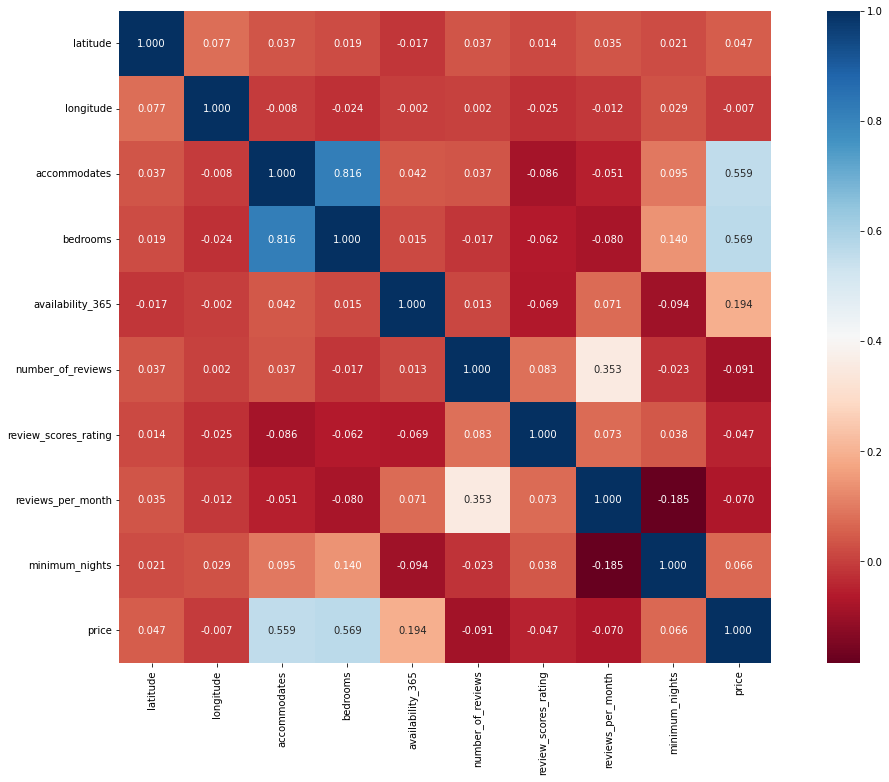

In [56]:
# Checking for multicollinearity/intercorrelation among variables and proposing feature selection for price
plt.subplots(figsize=(20, 12))
corr = df.loc[:,df.columns!='id'].corr() #excluding id in the matrix since it does not affect price
sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

**Observations:**

* A `strong correlation` is observed for price with `accommodates` and `number of bedrooms`
* A `strong intercorrelation` is observed between `accommodates` and `bedrooms`, this is justified as the two measures are related to each other
* The `price` *does not seem to be affected by the* `review_score_rating`, an observation that was **not expected but observed**, this poses a `challenge` (limitation) to this analysis project

### Section 3.3 Geospatial Analysis

Since `latitude` and `longitude` are geographical features, these features are better visualised with the help of maps and scatter plots. Any inferences pertaining to these geographical variables are therefore made with the following plots.

In [57]:
# Plotting the distriubtion of listings in Edinburgh
map_plot = folium.Map(location=[55.95, -3.2], zoom_start= 10.5)

coordinates= []
for x, y in zip(df.latitude, df.longitude):
    coordinates.append([x,y])
    
map_plot.add_child(plugins.MarkerCluster(coordinates))

map_plot

**Observations:**

We can observe that most of the listings are present in the heart of Edinburgh, or close to the city centre, as is expected.  There is scope to introduce listings in areas not covered presently to cater to customers of all demographics.

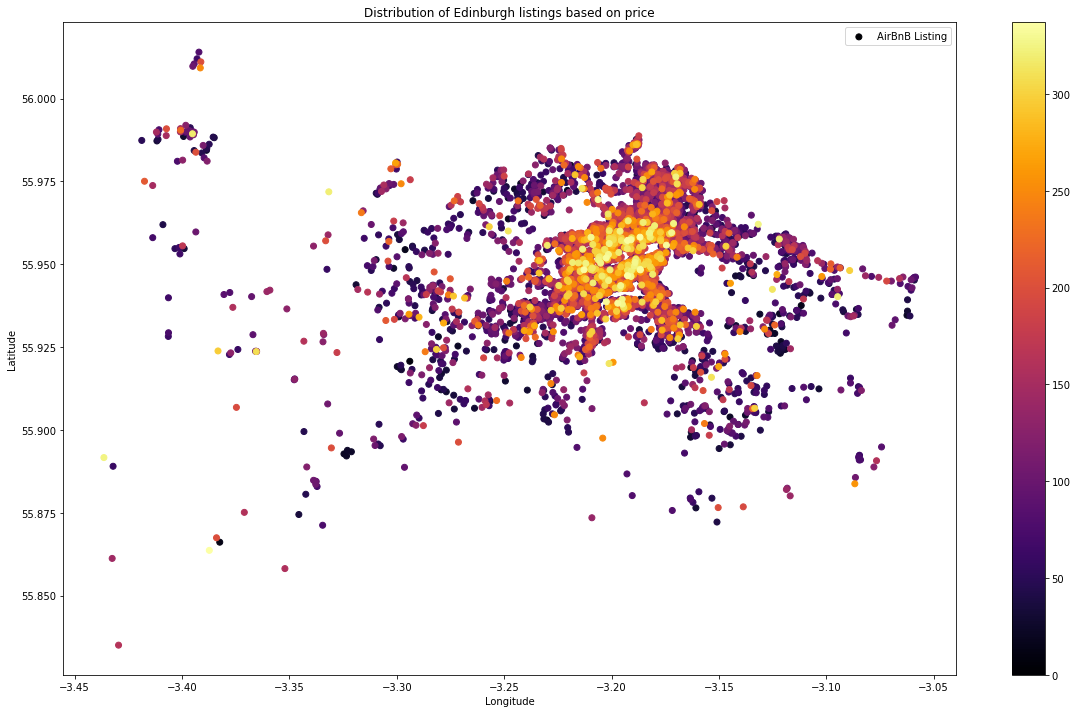

In [58]:
# Scatter plot to view listings as a legend on their current prices
fig, ax = plt.subplots(figsize=(20, 12))

plt.title("Distribution of Edinburgh listings based on price")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sctr = ax.scatter(data = df.sort_values('price', ascending=True), 
                  x='longitude',y='latitude', 
                  label='AirBnB Listing', c='price',
                  cmap=plt.get_cmap('inferno'))

plt.colorbar(sctr, ax=ax)
ax.legend()
plt.show()

**Observations:**

We further notice that the higher priced listings are present in Edinburgh city centre, or areas near the city's tourist attraction, Edinburgh Castle, such as New Town West, Old Town, Princes Street and Leith Street, which is justified and in line with the results obtained by observing the most expensive neighburhoods in Section 3.1

### Section 4. Text Analysis

It is beneficial to analyse what amenities are provided for the most expensive and least expensive listings, to better evaluate the quality of service associated with the price of listings.

### Section 4.1 Tokenisation and Stopwords

In [59]:
# Define a function to break down texts into tokens and also convert each token into lowercase
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w.lower() for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

In [60]:
# Remove commonly used words that are not relevant to the analysis
sp = spacy.load('en_core_web_sm')
spacy_stopwords = sp.Defaults.stop_words
stop = stopwords.words('english')+list(spacy_stopwords)+list(string.ascii_lowercase)

In [61]:
# Show the first 3 rows of dataframe after removal of irrelevant tokens
df['amenities'] = df['amenities'].apply(tokenizeandstopwords)
df.head(3)

,id,name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,amenities,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,minimum_nights,price
0,31523141,"Cosy, comfy, entire house, 2 bedrooms and slee...",Gilmerton South and the Murrays,55.88566,-3.08646,Entire home/apt,6,2.0,shampoo hangers private entrance stove hot wat...,259,45,4.22,1.06,3,105.0
1,16612439,Old Manse luxury studio apartment near Edinburgh,Gilmerton South and the Murrays,55.91416,-3.08876,Entire home/apt,2,1.0,shampoo breakfast hangers private entrance hea...,70,32,4.97,0.51,3,85.0
2,30558669,Large Double Room in Shared Flat with Sea View,Trinity East and The Dudleys,55.98065,-3.19888,Private room,2,1.0,shampoo breakfast hangers heating backyard sto...,193,87,4.92,2.11,2,46.0


### Section 4.2 Amenities Word Cloud

In [62]:
# Rank the dataframe according to price (descending)
df_amenities_sort = df.sort_values('price', ascending=False)

In [63]:
# Select the first half of highest priced listings to view their amenities
df_amenities_top = df_amenities_sort[:3454] #considering first half of the complete dataset
df_amenities_top.head(3)

,id,name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,amenities,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,minimum_nights,price
3186,30873108,The Hayloft (UK5319),Balerno and Bonnington Village,55.86366,-3.38731,Entire home/apt,4,2.0,dedicated workspace iron bed linens hangers pr...,291,1,5.00,0.04,1,337.0
3998,37700467,"Stylish, Central and Sizeable 3 Bedroom Apartment",New Town East and Gayfield,55.95819,-3.18677,Entire home/apt,6,3.0,shampoo dishes silverware hangers essentials h...,0,1,1.00,0.03,2,336.0
3608,35027103,"Bright, spacious, comfortable Old Town flat","Old Town, Princes Street and Leith Street",55.94656,-3.19259,Entire home/apt,10,4.0,private gym nearby hangers heating stove board...,147,128,4.45,3.22,2,336.0


In [64]:
# Select the second half of least priced listings to view their amenities
df_amenities_bottom = df_amenities_sort[-3454:] #considering second half of the complete dataset
df_amenities_bottom.head(3)

,id,name,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,amenities,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,minimum_nights,price
2197,21579651,Cosy & Modern Central Apartment,Hillside and Calton Hill,55.95851,-3.18127,Entire home/apt,3,2.0,clothing storage induction stove hangers heati...,34,326,4.93,5.58,2,114.0
3677,35609455,Beautiful flat in the New Town,Broughton North and Powderhall,55.96572,-3.19600,Entire home/apt,2,1.0,shampoo hangers private entrance clothing stor...,69,43,4.86,1.12,2,114.0
1412,14532428,⭐amazing apartments: Annandale St - free parking⭐,Broughton South,55.96090,-3.18492,Entire home/apt,5,1.0,shampoo hdtv amazon prime video netflix hanger...,55,62,4.81,0.84,2,114.0


In [65]:
# Define a function to generate wordclouds
def generate_word_cloud(text,wc_title):
    wordcloud = WordCloud(
        max_words=100,
        width = 2000,
        height = 1000,
        background_color = 'black').generate(str(text))
    plt.rcParams["figure.figsize"] = (20,20)
    plt.title(wc_title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

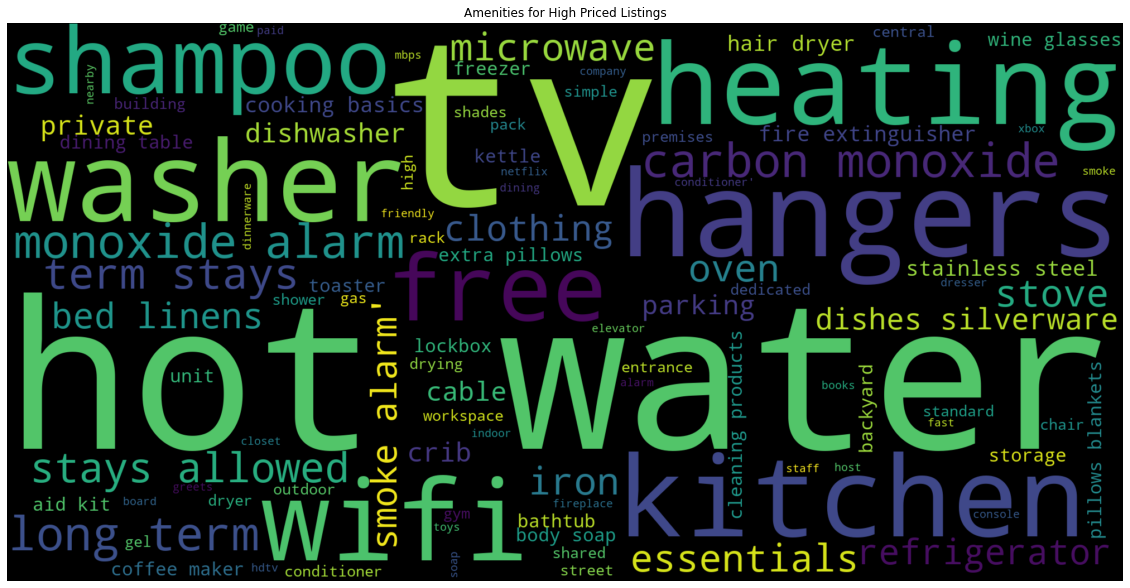

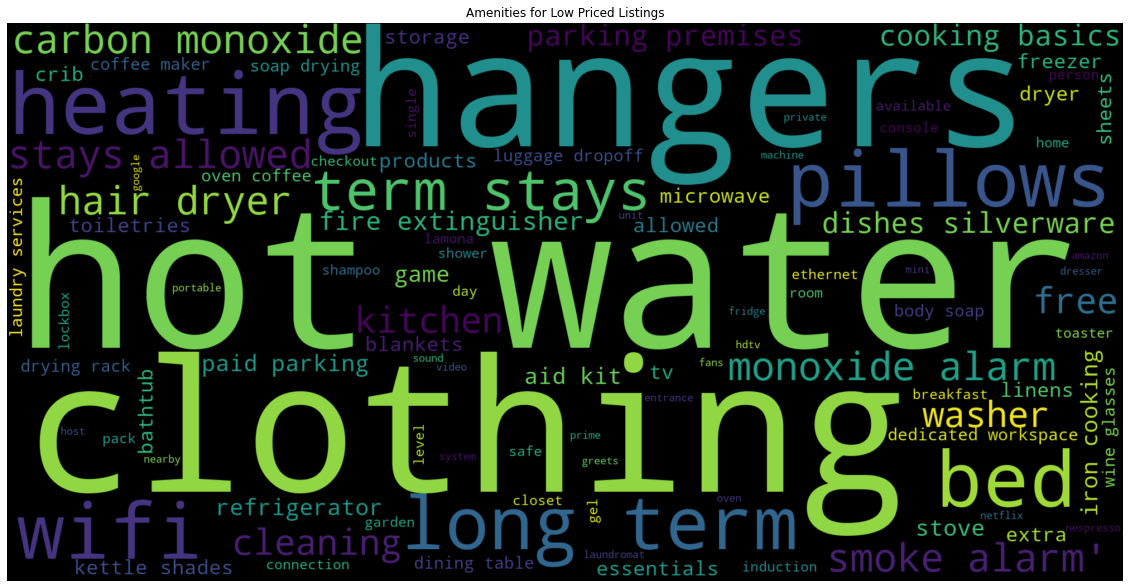

In [66]:
# Generate the wordclouds for amenities
amenities_top = df_amenities_top['amenities'].values
amenities_bottom = df_amenities_bottom['amenities'].values

generate_word_cloud(amenities_top,'Amenities for High Priced Listings')
generate_word_cloud(amenities_bottom,'Amenities for Low Priced Listings')

**Observations:**

While **basic amenities** like `hot water, wifi, heating, hangers` are made available in both high priced and low-priced listings.

We observe that most of the high-priced listings have **luxury amenities** like `TV, washer, kitchen`, which is less available in the lower priced listings.

**---------------------------------------------------------------------------------------------- END OF CODE ----------------------------------------------------------------------------------------------**

# Mini Report

To make recommendation for Airbnb, we visualise processed data and conduct statistical, geospatial and feature analysis to tackle key questions of how the client can expand and enhance its current listings in terms of offered facilities and services.

The geospatial data shows current listings in Edinburgh, which are highly concentrated in the city centre, and covered moderately in surrounding areas. The scatter plot indicates that areas near city centre such as New Town West and Old Town, Princes Street and Leith Street are highly priced, owing to their proximity to city's tourist attractions like Edinburgh Castle. The average price of listings in Edinburgh is 125.51 USD, with average review score rating 4.76. 

<br>
<div>
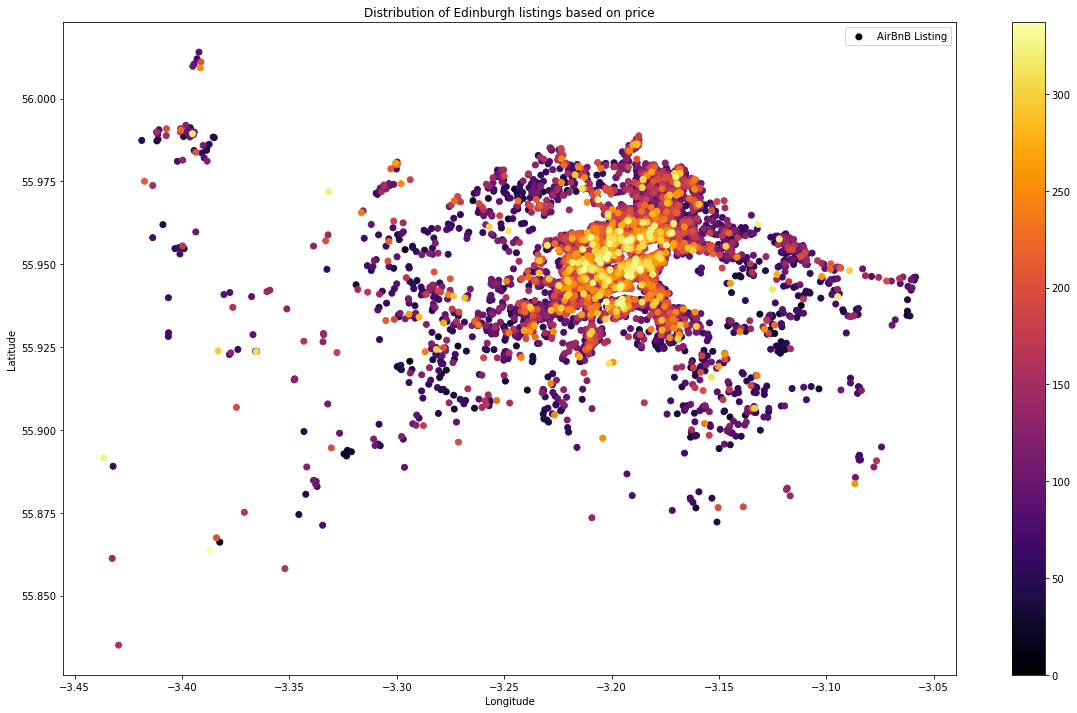
</div>

In general, price has high correlation with number of accommodates and bedrooms, 55.9% and 56.9%, respectively. The key criteria on listings expansion should therefore consider balance between pricing and number of accommodates and bedrooms. The price was not affected by review score rating; yet it is still considered a valuable qualitative input for future improvements.

<br>
<div>
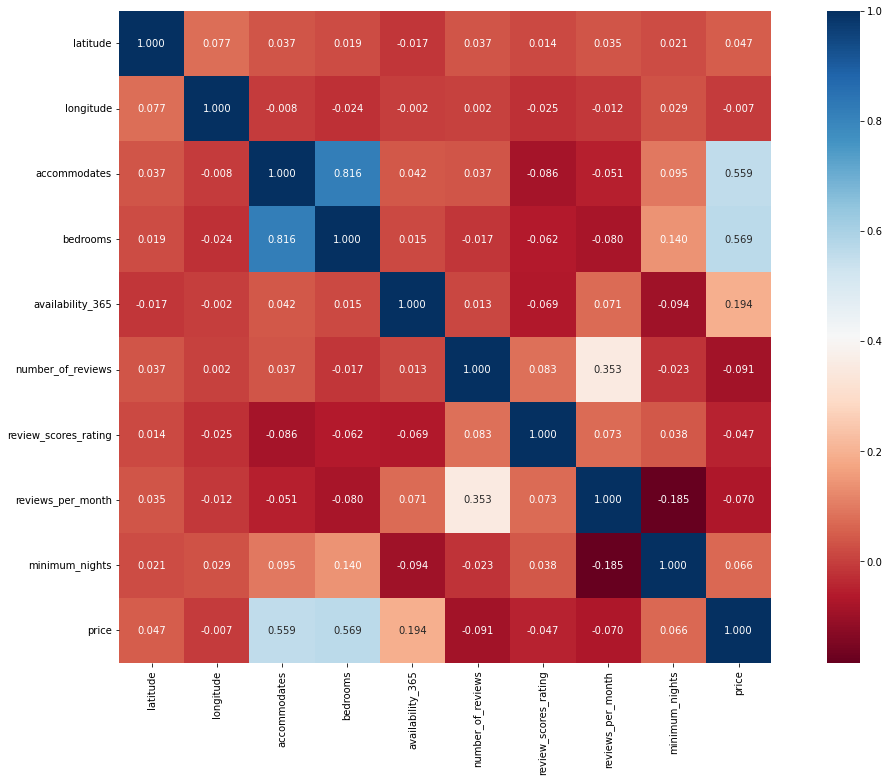
</div>

The amenities provided were analysed by word cloud, by drawing a comparison between 50% high-priced and 50% low-priced listings. Some amenities are considered necessary in determining price point; therefore, Airbnb should monitor and enhance its future listings accordingly. For example, high-priced listings generally provide luxury amenities like TV, kitchen and washer while basic amenities like hot water, wifi and heating are provided by all listings. 

In conclusion, we suggest Airbnb to expand its listings considering suitable location, price point, size, and facilities.

(249 words)